In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import warnings

# Filter out any warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install -q ipywidgets
!pip install ipywidgets --upgrade
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
# installing ipywidgets
# upgrading installed library
# enabling jupyter extension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
# Github URL
url = "https://raw.githubusercontent.com/tylerphonglam/Project4-Homepriceprediction/main/ontario.csv"

In [ ]:
# Reading Ontario dataset into a dataframe
ontario = pd.read_csv(url)

In [ ]:
# 14015 rows and 10 columns are in the dataset
ontario

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
14010,Regina,399900.0,1777 FORGET ST,4,1,Ontario,226404,50.4547,-104.6067,90000.0
14011,Saskatoon,1099900.0,2556 MAYFAIR,3,3,Ontario,266141,52.1333,-106.6833,89000.0
14012,Saskatoon,1149900.0,2552 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0
14013,Saskatoon,1099900.0,2548 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0


In [ ]:
# making copy of our dataframe
df = ontario.copy()

In [ ]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14015 entries, 0 to 14014
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  14015 non-null  object 
 1   Price                 14015 non-null  float64
 2   Address               14015 non-null  object 
 3   Number_Beds           14015 non-null  int64  
 4   Number_Baths          14015 non-null  int64  
 5   Province              14015 non-null  object 
 6   Population            14015 non-null  int64  
 7   Latitude              14015 non-null  float64
 8   Longitude             14015 non-null  float64
 9   Median_Family_Income  14015 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
# Generate descriptive statistics of the DataFrame's numerical columns
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,1.401500e+04,14015.000000,14015.000000,1.401500e+04,14015.000000,14015.000000,14015.000000
mean,9.556221e+05,3.476775,2.620335,8.528788e+05,43.800289,-79.764878,93573.813771
std,8.108259e+05,1.909135,1.394161,1.542558e+06,0.996928,2.133919,15141.134451
min,2.500000e+04,0.000000,0.000000,7.205100e+04,42.283300,-123.936400,73000.000000
25%,5.909500e+05,3.000000,2.000000,1.443560e+05,43.183300,-80.472800,82000.000000
50%,7.750000e+05,3.000000,2.000000,3.359490e+05,43.741700,-79.866700,92000.000000
75%,1.088000e+06,4.000000,3.000000,7.295600e+05,43.900000,-79.233300,98000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,52.133300,-75.695000,133000.000000


In [ ]:
# Group the DataFrame by "City", "Number_Beds", and "Number_Baths", then calculate the mean of "Price" for each group
data = df.groupby(["City", "Number_Beds", "Number_Baths"]).aggregate({"Price": "mean"})

In [ ]:
# Reset the index to make the grouped columns regular columns in the resulting DataFrame
data = data.reset_index()

In [ ]:
# Head of the dataframe
data.head()

,City,Number_Beds,Number_Baths,Price
0,Barrie,0,0,189000.000000
1,Barrie,0,1,424900.000000
2,Barrie,1,1,678787.730769
3,Barrie,2,0,899900.000000
4,Barrie,2,1,495774.958333


In [ ]:
def update_plot(change):
    select_baths.options = data[data["Number_Beds"] == change.new]["Number_Baths"].unique()

def plot_graph(beds, baths):
    df1 = data[(data["Number_Beds"] == beds) & (data["Number_Baths"] == baths)]
    df1.sort_values(by="Price", inplace=True)

    # Create a bar graph using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.bar(df1['City'], df1['Price'], color='blue')

    # Customize the appearance
    plt.xlabel('City')
    plt.ylabel('Price')
    plt.title(f'House Prices in Different Cities\n(Beds: {beds}, Baths: {baths})')
    plt.xticks(rotation=45, ha="right")

    # Show the plot
    plt.show()

In [ ]:
list1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
select_beds = widgets.Dropdown(
    options=list1,
    value=list1[0],
    description='Beds:',
    disabled=False,
)
select_beds.observe(update_plot, names='value')

In [ ]:
select_baths = widgets.Dropdown(
    options=data[data["Number_Beds"] == list1[0]]["Number_Baths"].unique(),
    value=data[data["Number_Beds"] == list1[0]]["Number_Baths"].unique()[0],
    description='Baths:',
    disabled=False,
)

In [ ]:
widgets.interactive(plot_graph, beds=select_beds, baths=select_baths)

interactive(children=(Dropdown(description='Beds:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Dropdown…

In [ ]:
# list_nbeds = df["Number_Beds"].unique()
list_nbeds = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
data2 = df[df["Number_Beds"].isin(list_nbeds)]

In [ ]:
df.shape,data2.shape

((14015, 10), (13954, 10))

In [ ]:
data3 = data2.groupby(["Number_Beds"]).aggregate({"Price": "mean"}).reset_index()

In [ ]:
data3["Number_Beds"] = data3["Number_Beds"].astype(str)

In [ ]:
data3.sort_values(by="Price",inplace=True)

In [ ]:
data3

,Number_Beds,Price
1,1,4.973675e+05
2,2,6.553747e+05
0,0,7.052746e+05
3,3,8.081843e+05
4,4,1.091661e+06
5,5,1.342872e+06
6,6,1.457019e+06
9,9,1.501952e+06
7,7,1.589354e+06
8,8,1.882766e+06


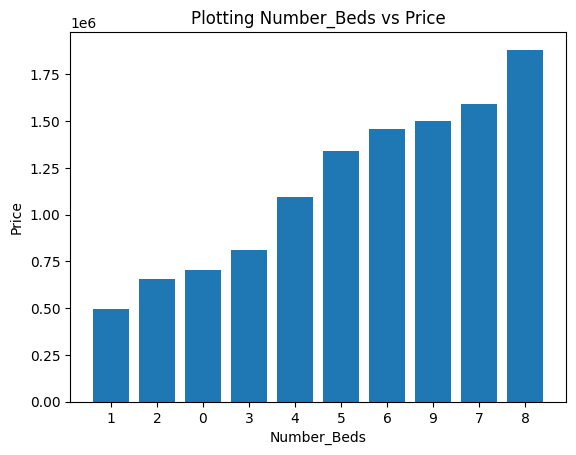

In [ ]:
plt.bar(data3['Number_Beds'], data3['Price'])

# Adding labels to the axes
plt.xlabel('Number_Beds')
plt.ylabel('Price')


# Adding a title to the plot
plt.title('Plotting Number_Beds vs Price')

# Display the plot
plt.show()

In [ ]:
list_nb = df["Number_Baths"].unique()

In [ ]:
data2 = df[df["Number_Baths"].isin(list_nb)]

In [ ]:
data3 = data2.groupby(["Number_Baths"]).aggregate({"Price": "mean"}).reset_index()

In [ ]:
data3["Number_Baths"] = data3["Number_Baths"].astype(str)

In [ ]:
data3.sort_values(by="Price",inplace=True)

In [ ]:
data3

,Number_Baths,Price
1,1,5.420840e+05
2,2,7.337255e+05
0,0,8.632492e+05
3,3,9.882464e+05
4,4,1.300871e+06
5,5,1.991334e+06
6,6,2.526937e+06
12,12,3.019940e+06
16,20,3.050000e+06
8,8,3.490264e+06


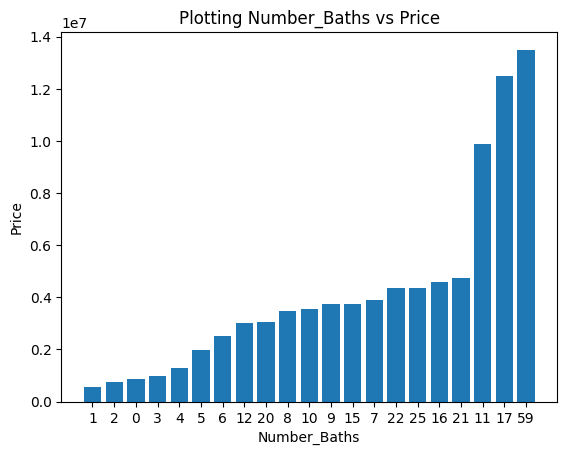

In [ ]:
plt.bar(data3['Number_Baths'], data3['Price'])

# Adding labels to the axes
plt.xlabel('Number_Baths')
plt.ylabel('Price')

# Adding a title to the plot
plt.title('Plotting Number_Baths vs Price')

# Display the plot
plt.show()

In [ ]:
list_city = df["City"].unique()

In [ ]:
data2 = df[df["City"].isin(list_city)]

In [ ]:
data3 = data2.groupby(["City"]).aggregate({"Price": "mean"}).reset_index()

In [ ]:
data3.sort_values(by="Price",inplace=True)

In [ ]:
data3

,City,Price
12,Regina,3.999000e+05
14,Sault Ste. Marie,4.251357e+05
17,Thunder Bay,4.597032e+05
16,Sudbury,5.960874e+05
19,Windsor,6.430189e+05
5,Kingston,7.696073e+05
8,Nanaimo,7.700000e+05
10,Ottawa,7.837592e+05
7,London,7.976271e+05
11,Peterborough,7.988272e+05


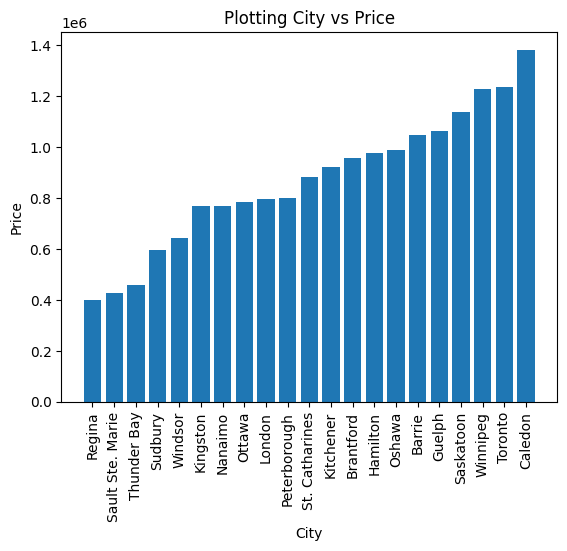

In [ ]:
plt.bar(data3['City'], data3['Price'])

# Adding labels to the axes
plt.xlabel('City')
plt.ylabel('Price')

plt.xticks(rotation=90)


# Adding a title to the plot
plt.title('Plotting City vs Price')

# Display the plot
plt.show()

In [ ]:
# outliers
# Outliers, or data points that deviate significantly from the general pattern, can be identified in a pair plot.
# Outliers might indicate errors in data collection or interesting phenomena in the dataset

# correlation
# Patterns in scatterplots can give an indication of the correlation between variables.
# If points cluster in a particular way (e.g., forming a line), it suggests a relationship between the variables.
# The absence of a clear pattern may suggest low or no correlation.

# multivariate / bivarite patterns in our data
# In addition to bivariate relationships, pair plots allow you to observe patterns involving three or more variables simultaneously.
# For example, you can look for clusters of points or discern patterns that involve more than two variables.

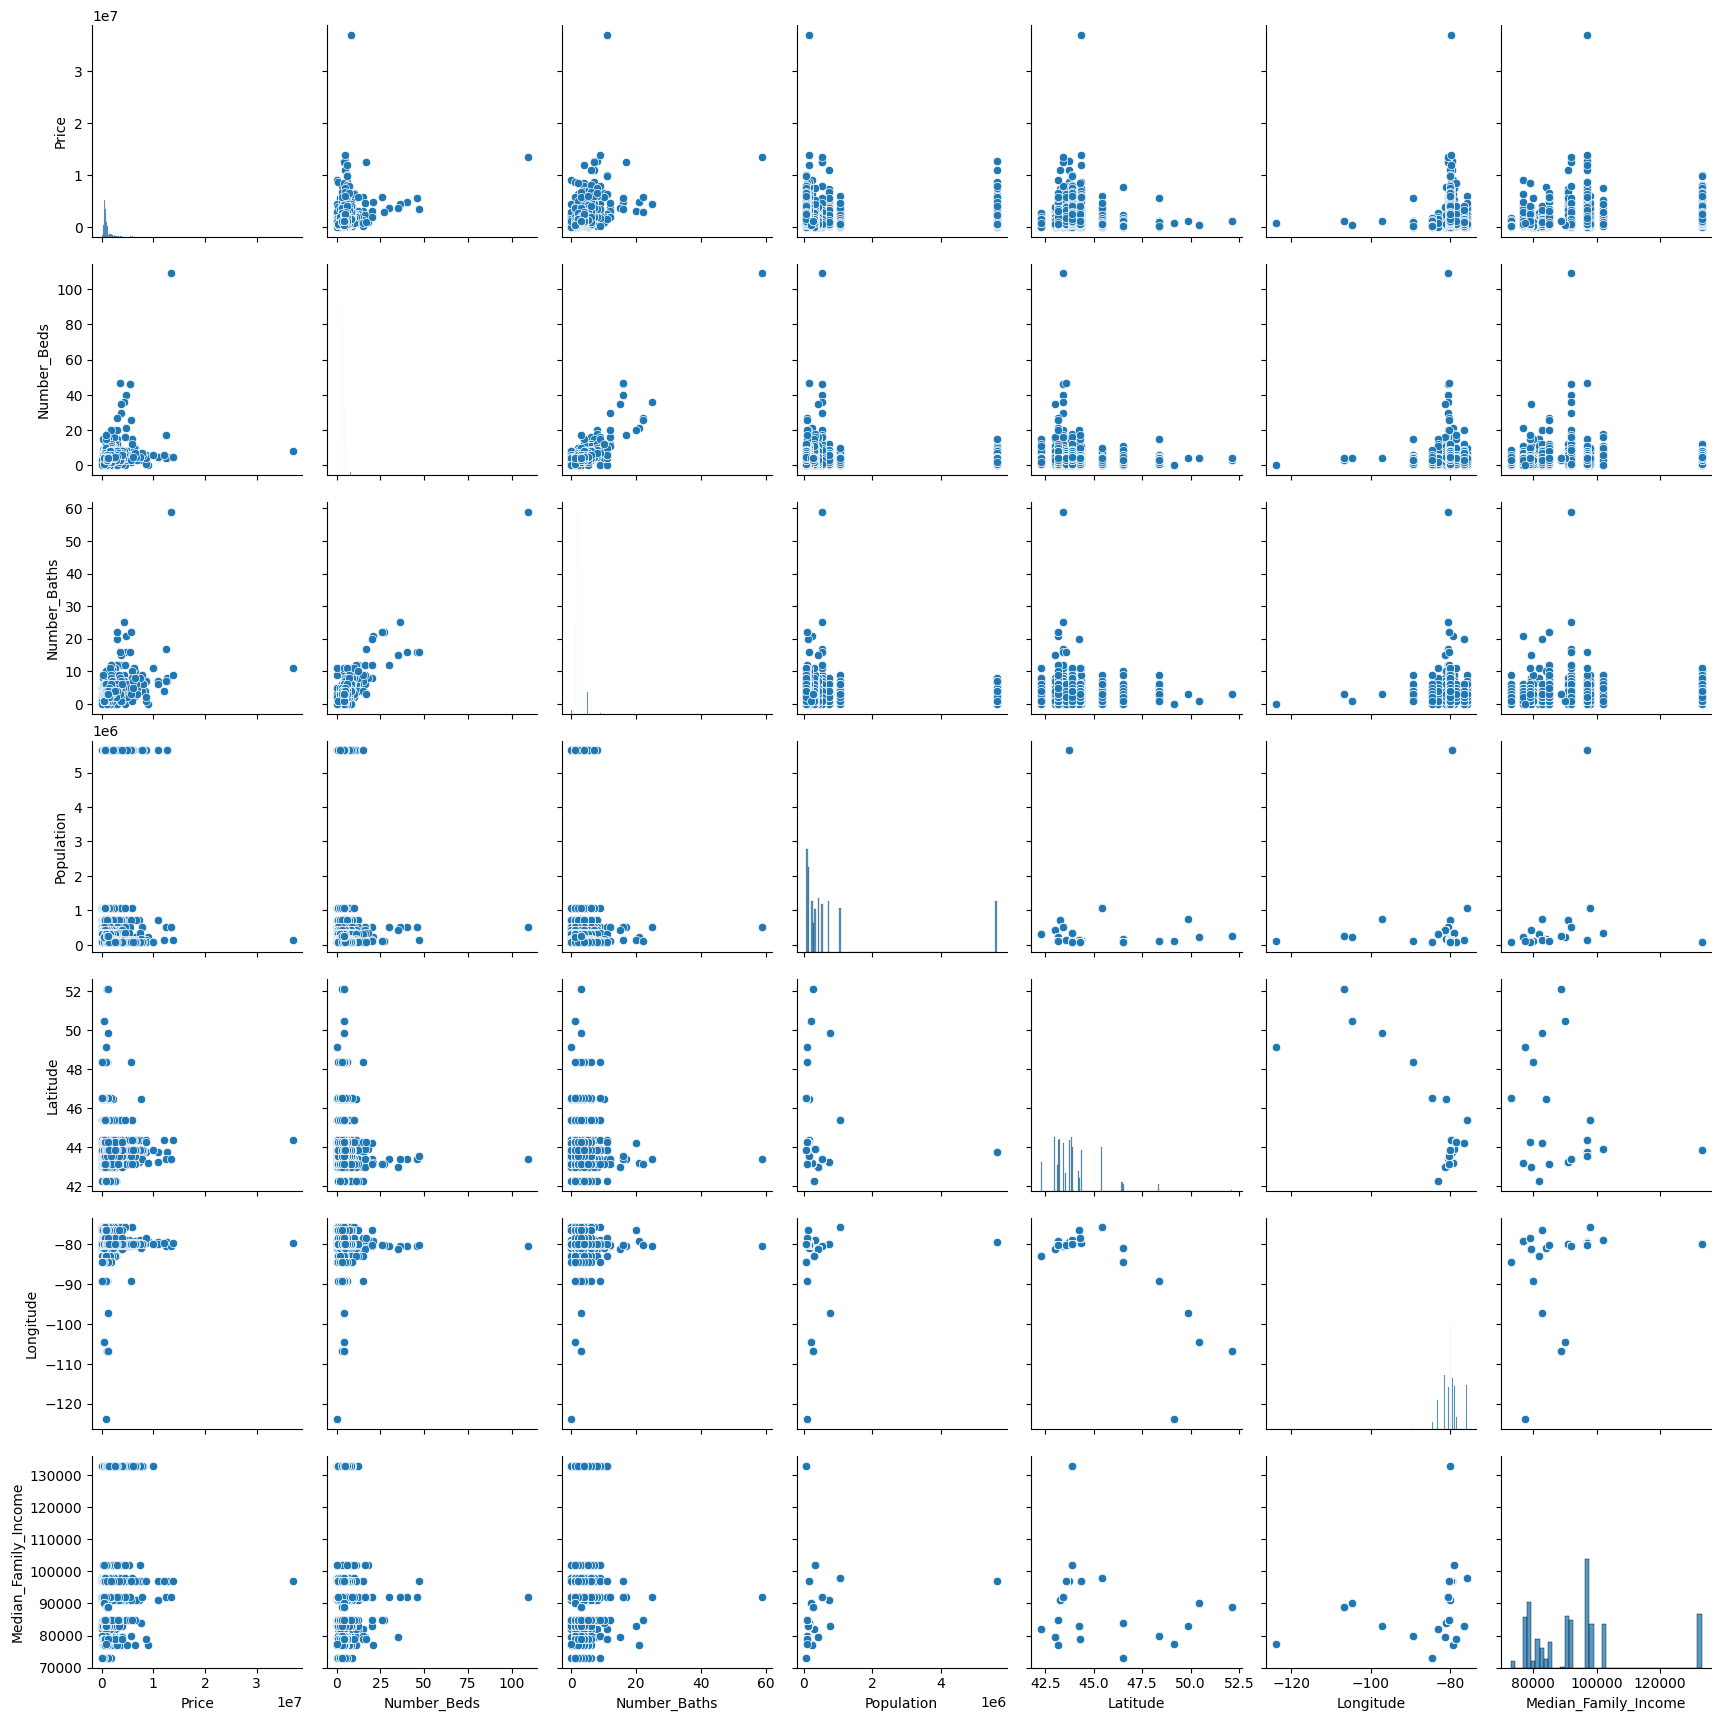

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
# Price range which its been divide like min price to max price
# density is number of house in that price range

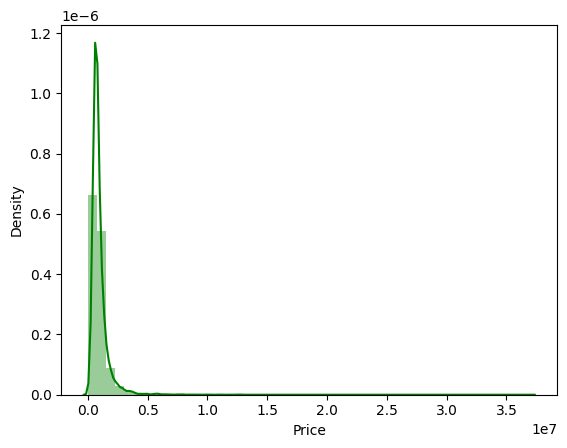

In [ ]:
sns.distplot(df['Price'], color='green')
plt.show()

In [ ]:
# repeating address

In [ ]:
df.Address.value_counts().head(25)

450 Dundas Street E           5
140 CENTRAL Avenue            4
15 GORDON Avenue              4
17 BOWES Avenue               3
851 QUEENSTON Road            3
720 Grey Street               3
600 NORTH SERVICE Road        3
399 ELIZABETH Street          3
36 JAMES Street S             3
600 North Service Road        3
895 MAPLE Avenue              3
305 GARNER Road W             3
2850 VICTORIA Street N        2
56 SCOTS PINE Trail           2
65 LEINSTER Avenue S          2
36 BALMORAL Drive             2
202 WHARNCLIFFE Road S        2
#26 -2335 SHEPPARD AVE W      2
101 SHOREVIEW Place           2
347 TOWNSEND Drive            2
182 PELHAM Road               2
265 & 267 SPRINGBANK Drive    2
387 & 389 GLENDALE Avenue     2
71 BRISCOE Street E           2
#115 -320 DIXON RD            2
Name: Address, dtype: int64

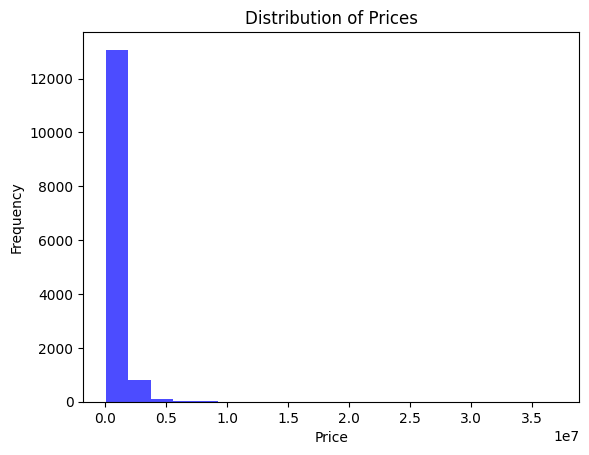

In [ ]:
plt.hist(df['Price'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [ ]:
# out of 14105 rows , our 12k houses are coming between 0 to 0.5 10 raise to 7

In [ ]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
14010,Regina,399900.0,1777 FORGET ST,4,1,Ontario,226404,50.4547,-104.6067,90000.0
14011,Saskatoon,1099900.0,2556 MAYFAIR,3,3,Ontario,266141,52.1333,-106.6833,89000.0
14012,Saskatoon,1149900.0,2552 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0
14013,Saskatoon,1099900.0,2548 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0


In [ ]:
df.columns

Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income'],
      dtype='object')

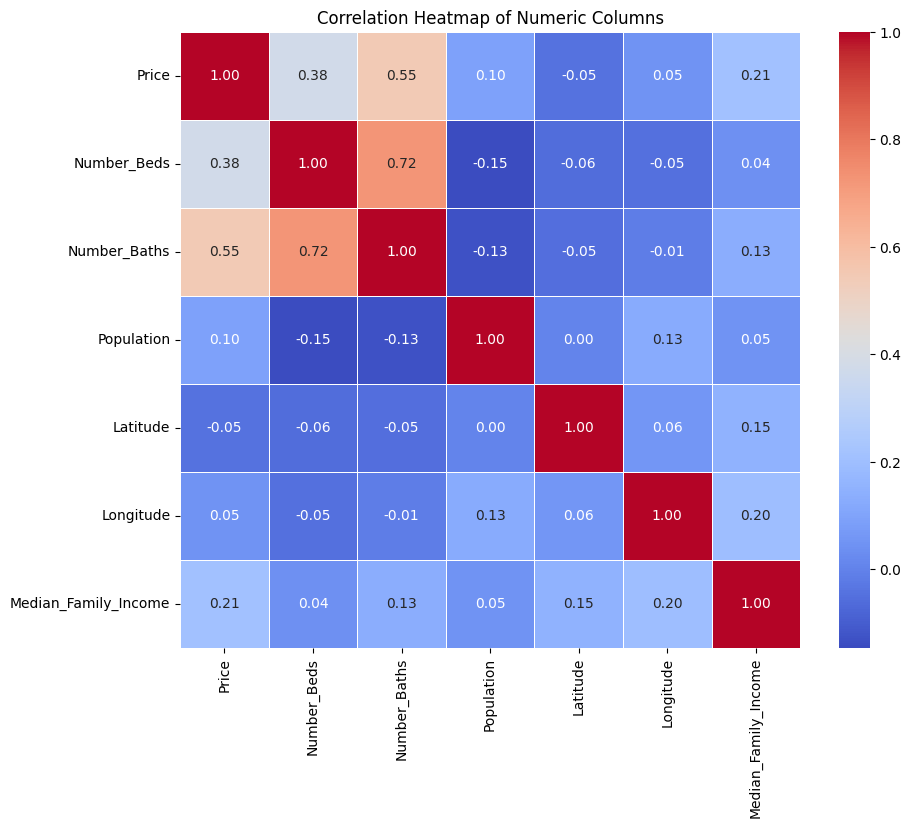

In [ ]:
# Assuming 'df' is your DataFrame
numeric_columns = ['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Latitude', 'Longitude', 'Median_Family_Income']

# Subset the DataFrame with only the numeric columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the appearance
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

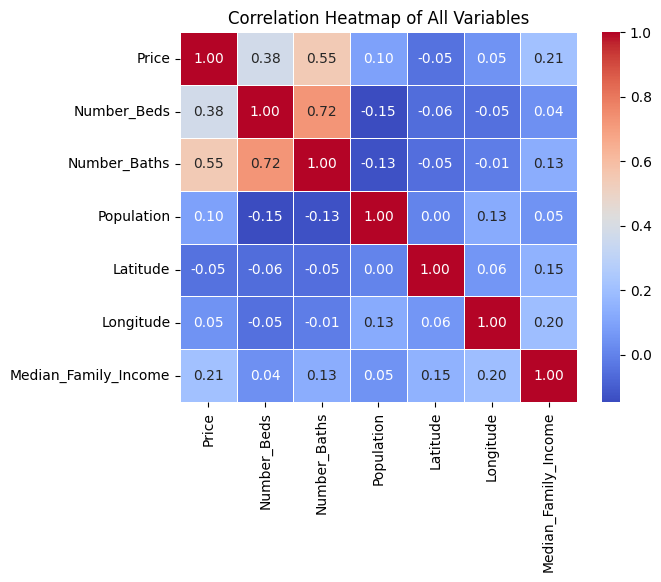

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Variables')
plt.show()

In [ ]:
# import statsmodels.api as sm

# X = df[['Number_Beds', 'Number_Baths', 'Population', 'Median_Family_Income']]
# X = sm.add_constant(X)  # Add a constant term for the intercept
# y = df['Price']

# model = sm.OLS(y, X).fit()
# print(model.summary())

# Predicting Price Based on some Features (Number of beds, baths and Population)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features for modeling
features_simple = ['Number_Beds']  # Select one feature for simple linear regression
features_multiple = ['Number_Beds', 'Number_Baths', 'Population']  # Select multiple features for multiple regression

# Split the data into training and testing sets
X_simple = df[features_simple].values.reshape(-1, 1)
X_multiple = df[features_multiple]
y = df['Price']

X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Simple Linear Regression
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

# Multiple Regression
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train)

# Make predictions
y_pred_simple = model_simple.predict(X_test_simple)
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Evaluate the models
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

# Display the results
print("Simple Linear Regression:")
print(f'Mean Squared Error: {mse_simple:.2f}')
print(f'R-squared: {r2_simple:.2f}')

print("\nMultiple Regression:")
print(f'Mean Squared Error: {mse_multiple:.2f}')
print(f'R-squared: {r2_multiple:.2f}')


Simple Linear Regression:
Mean Squared Error: 863633587592.47
R-squared: 0.10

Multiple Regression:
Mean Squared Error: 709473427884.86
R-squared: 0.26
